# Summary

## ComplementNB vs MultinomialNB

**ComplementNB**

ComplementNB implements the complement Naive Bayes (CNB) algorithm. CNB is an adaptation of the standard Multinomial Naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. Essentially, CNB uses the complement of each class to compute the model's weights. The intuition is that this helps to combat the bias in imbalanced datasets where, for example, the vocabulary is dominated by the majority class and could influence the log-likelihood estimates unfavorably for the minority class.

**MultinomialNB**

MultinomialNB implements the Naive Bayes algorithm for multinomially distributed data and is one of the most common variants used in text classification. This classifier is best suited for classification with discrete features (e.g., word counts for text classification). It calculates the likelihood of each label based on the frequency of words present in the documents.

**Differences**

**Bias Correction**: ComplementNB includes a specific adjustment that makes it more suited for dealing with data that is not uniformly distributed among classes.

**Performance on Imbalanced Datasets**: ComplementNB is known to work better on imbalanced datasets than MultinomialNB because it seeks to correct the bias in favor of the more frequent classes that can affect the latter.

**Underlying Principle**: The computation of the weights in ComplementNB is based on the complement of each class (not the class itself), which can result in different performance characteristics, particularly for datasets with many more instances of some classes than others.

## CountVectorizer vs TfidfVectorizer

**CountVectorizer** - Word Count Vectors
CountVectorizer converts a collection of text documents into a matrix of token counts. This approach is straightforward: it simply tallies how many times each word appears in each document.

Example:

Given two documents:

"the quick brown fox"
"the slow brown fox"
The word count matrix might look like this:

the	quick	brown	fox	slow

Doc 1	1	1	1	1	0

Doc 2	1	0	1	1	1

Each row represents a document, and each column represents a unique word in the corpus. The values are the counts of the word in each document.

**TfidfVectorizer** - TF-IDF Vectors
TfidfVectorizer transforms text into a matrix of TF-IDF features. Unlike simple counts, TF-IDF (Term Frequency-Inverse Document Frequency) reflects how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

Example:

Using the same two documents:

"the quick brown fox"
"the slow brown fox"
The TF-IDF matrix might look something like this (simplified values for illustration):

the	quick	brown	fox	slow

Doc 1	0.0	0.7	0.3	0.3	0.0

Doc 2	0.0	0.0	0.3	0.3	0.7

Here, words that are common across documents (like "the", "brown", "fox") have lower weights, whereas unique words (like "quick" in Document 1 and "slow" in Document 2) have higher weights. The exact values depend on the TF-IDF calculation and normalization used.

**Key Differences**

**CountVectorizer** provides a simple count of occurrences, which can be very useful but does not account for the relative importance of words within and across documents.

**TfidfVectorizer** weights the word counts by a measure of how unique they are to the document they appear in, thus giving more importance to words that are good at distinguishing between documents.

## TF-IDF

**Term Frequency (TF)**: Measures how frequently a term occurs in a document. Since documents can vary in length, TF is often divided by the document length (the total number of terms in the document) as a way of normalization.

**Inverse Document Frequency (IDF)**: Measures how important a term is. While computing TF, all terms are considered equally important. However, certain terms, like "is" or "the," may appear a lot of times but have little importance. Thus, we need to weigh down the frequent terms while scaling up the rare ones, by computing the following for a term "t":
IDF(t)=log [ (1+n) / (1+df(t)) ] + 1

where n is the total number of documents and df(t) is the number of documents with term t in it.

# Code

## Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
# from sklearn.metrics import roc_curve, auc, precision_recall_curve

## Load Data

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

# Data Path
train_data_path = '/content/gdrive/My Drive/W266 Final Project/datasets/train_data_binary.csv'
test_data_path = '/content/gdrive/My Drive/W266 Final Project/datasets/test_data_binary.csv'

# Load Raw Data
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

Mounted at /content/gdrive


## Data Overview

In [3]:
train_data.head()

,Comment,Labels
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [4]:
train_data.shape

(159571, 2)

array([[<Axes: title={'center': 'Labels'}>]], dtype=object)

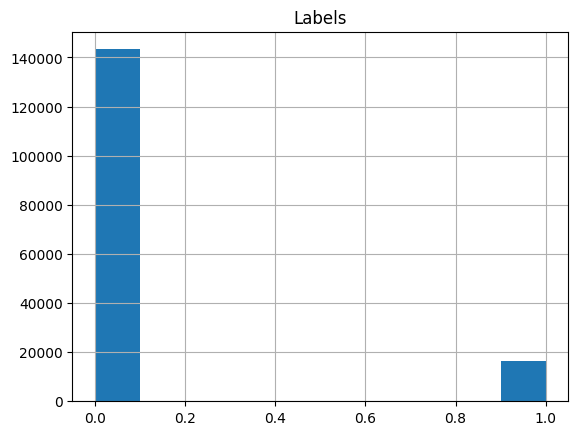

In [5]:
train_data.hist()

In [6]:
train_data['Labels'].value_counts()

Labels
0    143346
1     16225
Name: count, dtype: int64

In [7]:
#random undersampling with the same ratio
#check number of values per class
print("Before random undersampling", train_data['Labels'].value_counts())
# Splitting the data into train and test sets, but in this case, we'll only use the train set
train_subset, _ = train_test_split(train_data, test_size=0.6, random_state=42)

# If you want to reset the index of the subset
train_subset.reset_index(drop=True, inplace=True)
train_under = train_subset
print("After random undersampling", train_under['Labels'].value_counts())

Before random undersampling Labels
0    143346
1     16225
Name: count, dtype: int64
After random undersampling Labels
0    57280
1     6548
Name: count, dtype: int64


In [9]:
test_data.head()

,Comment,Labels
0,Thank you for understanding. I think very high...,0
1,:Dear god this site is horrible.,0
2,"""::: Somebody will invariably try to add Relig...",0
3,""" \n\n It says it right there that it IS a typ...",0
4,""" \n\n == Before adding a new product to the l...",0


In [10]:
test_data.shape

(63978, 2)

array([[<Axes: title={'center': 'Labels'}>]], dtype=object)

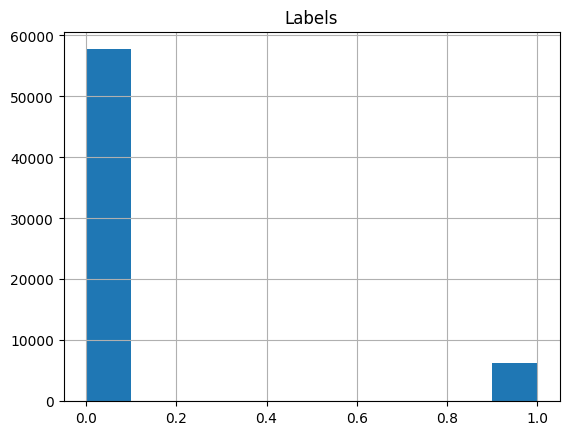

In [11]:
test_data.hist()

In [12]:
test_data['Labels'].value_counts()

Labels
0    57735
1     6243
Name: count, dtype: int64

In [13]:
#random undersampling with the same ratio
#check number of values per class
print("Before random undersampling", test_data['Labels'].value_counts())
# Splitting the data into train and test sets, but in this case, we'll only use the train set
test_subset, _ = train_test_split(test_data, test_size=0.6, random_state=42)

# If you want to reset the index of the subset
test_subset.reset_index(drop=True, inplace=True)
test_under = test_subset
print("After random undersampling", test_under['Labels'].value_counts())

Before random undersampling Labels
0    57735
1     6243
Name: count, dtype: int64
After random undersampling Labels
0    23130
1     2461
Name: count, dtype: int64


## Create train_texts, train_labels, test_texts, and test_labels

In [14]:
train_data = train_under
train_data.reset_index(drop=True, inplace=True)

In [15]:
train_texts = train_data['Comment']
train_texts

0        "\n\n Reverting Vandalism \n\nIs there a hot k...
1        "\n{{unblock | reason= \nDerogatory comments a...
2        Is it also a cheap version of the supernova in...
3        Legally, there are no rules which state any ge...
4          I forgot how regex's are entered in AWB though.
                               ...                        
63823    REDIRECT Talk:John Loveday (experimental physi...
63824    Back it up. Post the line here with the refere...
63825    I won't stop that. Sometimes Germanic equals G...
63826    "\n\n British Bands?  \n\nI think you've mista...
63827    You are WRONG. \n\nJustin Thompson is mentione...
Name: Comment, Length: 63828, dtype: object

In [16]:
train_labels = train_data['Labels']
train_labels

0        0
1        0
2        0
3        0
4        0
        ..
63823    0
63824    0
63825    1
63826    0
63827    0
Name: Labels, Length: 63828, dtype: int64

In [17]:
test_texts = test_under['Comment']
test_texts

0        Clayton High School \n Hello, I recently remov...
1        " \n\n  Please do not vandalize pages, as you ...
2                                  ::Learn to spell, yank.
3        " \n : As a member of the community, I have re...
4        == Eschew Obfuscation == \n\n If you're intere...
                               ...                        
25586    :Are you proposing something here or opining o...
25587    :I don't think there is sufficient reason to e...
25588    " \n\n == The harm of articles == \n\n Accordi...
25589    " \n\n == Local names 2nd time == \n\n  \n\n Y...
25590                fuckin super gay ass bitch headAlamos
Name: Comment, Length: 25591, dtype: object

In [18]:
test_labels = test_under['Labels']
test_labels

0        0
1        0
2        0
3        0
4        0
        ..
25586    0
25587    0
25588    0
25589    0
25590    1
Name: Labels, Length: 25591, dtype: int64

## CountVectorizer

In [19]:
vectorizer = CountVectorizer()
train_feature_vectors = vectorizer.fit_transform(train_texts)

# test_feature_vectors should have same number of features with train_feature_vectors, se use ".transform" instead of "fit.tranform"
test_feature_vectors = vectorizer.transform(test_texts)

In [20]:
train_feature_vectors

<63828x108713 sparse matrix of type '<class 'numpy.int64'>'
	with 2770396 stored elements in Compressed Sparse Row format>

In [21]:
test_feature_vectors

<25591x108713 sparse matrix of type '<class 'numpy.int64'>'
	with 1013411 stored elements in Compressed Sparse Row format>

### COMPLEMENT-NB

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93     23130
           1       0.44      0.72      0.55      2461

    accuracy                           0.89     25591
   macro avg       0.71      0.81      0.74     25591
weighted avg       0.92      0.89      0.90     25591

ROC AUC Score: 0.8125799040913741


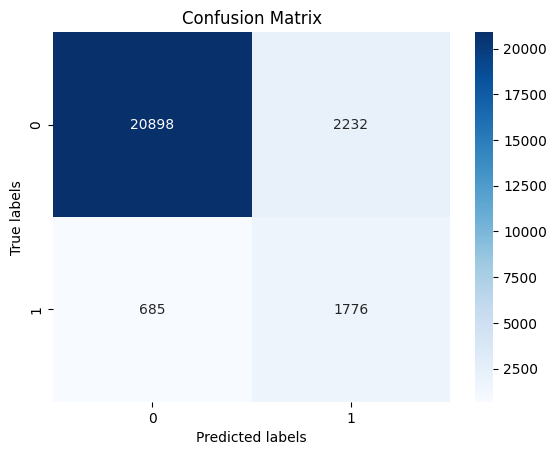

In [22]:
#TRAINING

clf = ComplementNB()
clf.fit(train_feature_vectors, train_labels)

# PREDICTION
predictions = clf.predict(test_feature_vectors)

# Evaluate the model
print('Classification Report:')
print(classification_report(test_labels, predictions))

print("ROC AUC Score:", roc_auc_score(test_labels, predictions))

# Plot confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### MultinomialNB

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     23130
           1       0.55      0.62      0.58      2461

    accuracy                           0.91     25591
   macro avg       0.75      0.78      0.77     25591
weighted avg       0.92      0.91      0.92     25591

ROC AUC Score: 0.7829893858239553


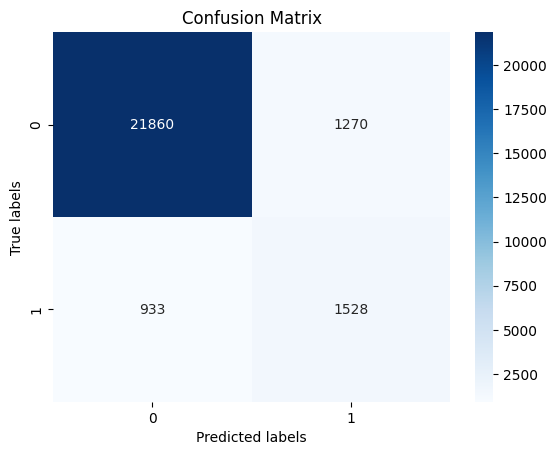

In [23]:
# TRAINING

clf = MultinomialNB()
clf.fit(train_feature_vectors, train_labels)

# PREDICTION
predictions = clf.predict(test_feature_vectors)

# Evaluate the model
print('Classification Report:')
print(classification_report(test_labels, predictions))

print("ROC AUC Score:", roc_auc_score(test_labels, predictions))

# Plot confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## TfidfVectorizer

In [24]:
tfidf_transformer = TfidfTransformer()
train_texts_tfidf = tfidf_transformer.fit_transform(train_feature_vectors)
test_texts_tfidf = tfidf_transformer.transform(test_feature_vectors)

### COMPLEMENT-NB

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     23130
           1       0.54      0.44      0.49      2461

    accuracy                           0.91     25591
   macro avg       0.74      0.70      0.72     25591
weighted avg       0.90      0.91      0.91     25591

ROC AUC Score: 0.702228460481567


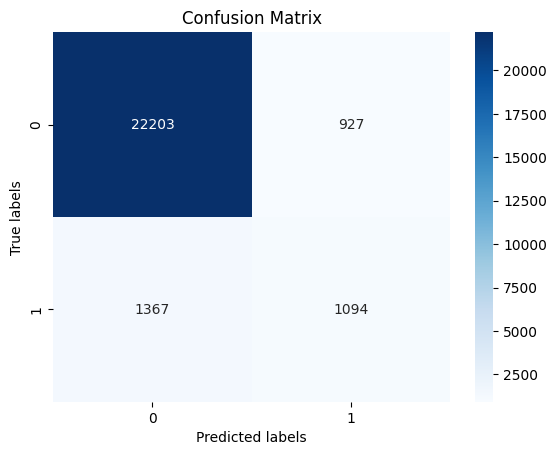

In [25]:
# TRAINING

clf = ComplementNB()
clf.fit(train_texts_tfidf, train_labels)

# PREDICTION
predictions = clf.predict(test_texts_tfidf)

# Evaluate the model
print('Classification Report:')
print(classification_report(test_labels, predictions))

print("ROC AUC Score:", roc_auc_score(test_labels, predictions))

# Plot confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### MultinomialNB

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     23130
           1       0.88      0.15      0.26      2461

    accuracy                           0.92     25591
   macro avg       0.90      0.58      0.61     25591
weighted avg       0.91      0.92      0.89     25591

ROC AUC Score: 0.5762618596758811


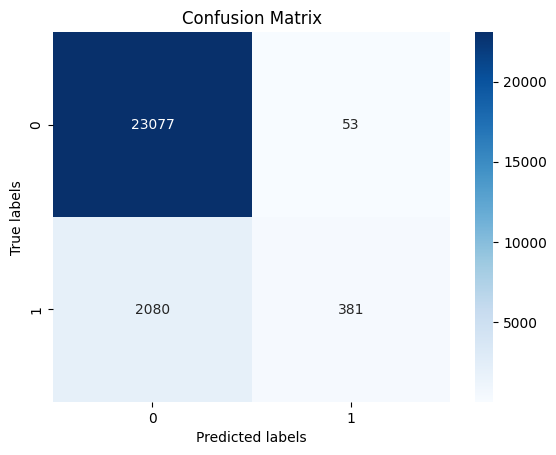

In [26]:
# TRAINING

clf = MultinomialNB()
clf.fit(train_texts_tfidf, train_labels)

# PREDICTION
predictions = clf.predict(test_texts_tfidf)

# Evaluate the model
print('Classification Report:')
print(classification_report(test_labels, predictions))

print("ROC AUC Score:", roc_auc_score(test_labels, predictions))

# Plot confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
